In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
wine_data = pd.read_csv('https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv')
wine_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [6]:
# Assuming the last column is the wine type (red/white), and the rest are features
X = wine_data.iloc[:, :-1]  # Features
y = wine_data.iloc[:, -1]   # Target (wine type)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# 

In [9]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # We are reducing to 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

# Check the explained variance ratio to see how much variance is captured
print("Explained variance by principal components:", pca.explained_variance_ratio_)

Explained variance by principal components: [0.36198848 0.1920749 ]


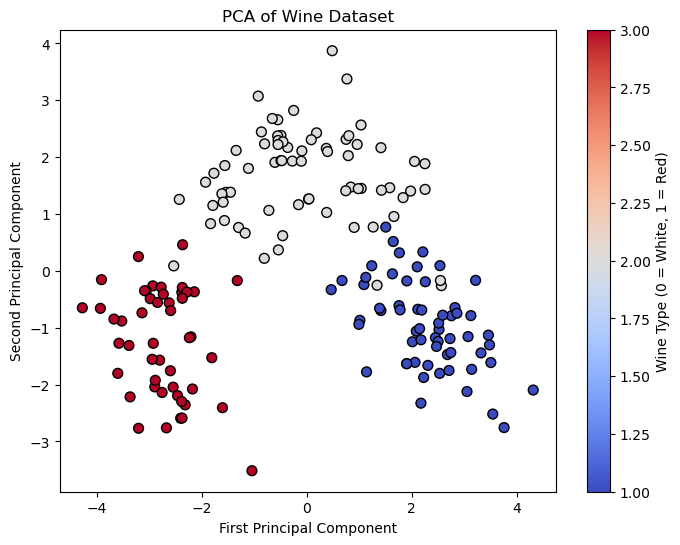

In [10]:
# Create a scatter plot to visualize the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Wine Dataset')
plt.colorbar(label='Wine Type (0 = White, 1 = Red)')
plt.show()